# `MOMgrid`: Python class to standardize MOM grid metrics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import momgrid

In [3]:
print(momgrid.__version__)

0.0.1


## Example: Symmetric Memory Modes

Two examples below are provided for non-symmetric and symmetric memory mode experiments. The class initalization should work seamlessly on both cases

In [4]:
OM4_hgrid_file = xr.open_zarr(
    "https://extranet.gfdl.noaa.gov/~John.Krasting/momgrid/OM4/ocean_hgrid"
)
OM4_topog_file = xr.open_zarr(
    "https://extranet.gfdl.noaa.gov/~John.Krasting/momgrid/OM4/ocean_topog"
)
res_hgrid = momgrid.MOMgrid(OM4_hgrid_file, OM4_topog_file, symmetric=True)

In [5]:
OM4_static_file = xr.open_zarr(
    "https://extranet.gfdl.noaa.gov/~John.Krasting/momgrid/OM4/ocean_static"
)
res_static = momgrid.MOMgrid(OM4_static_file, symmetric=True)

In [6]:
OM4_topog_file = xr.open_zarr(
    "https://extranet.gfdl.noaa.gov/~John.Krasting/momgrid/OM4/ocean_topog"
)

### Helper Function for Plotting

In [7]:
def _plot_panel(var, panel, stats=False):
    nrows = 7
    ncols = 3
    ax = plt.subplot(nrows, ncols, panel)
    ax.pcolormesh(var)
    if stats:
        ax.text(
            1.01, 0.5, f"min: {var.min()}\nmax: {var.max()}", transform=ax.transAxes
        )
    return ax

### Evaluate the Tracer Cell Metrics

Text(0, 0.5, 'wet')

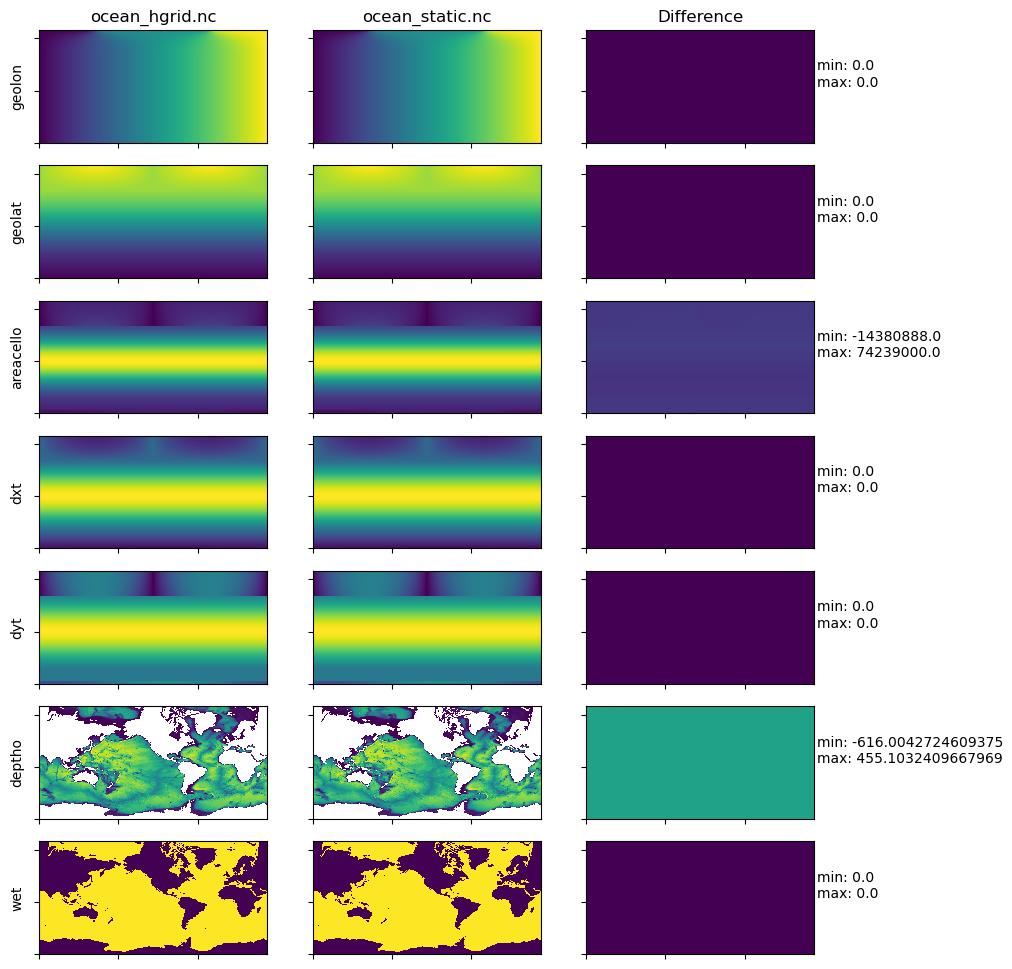

In [8]:
fig = plt.figure(figsize=(10, 12), dpi=100)

s = res_static
h = res_hgrid

axes = []
axes.append(_plot_panel(h.geolon, 1))
axes.append(_plot_panel(s.geolon, 2))
axes.append(_plot_panel(h.geolon - s.geolon, 3, stats=True))

axes.append(_plot_panel(h.geolat, 4))
axes.append(_plot_panel(s.geolat, 5))
axes.append(_plot_panel(h.geolat - s.geolat, 6, stats=True))

axes.append(_plot_panel(h.areacello, 7))
axes.append(_plot_panel(s.areacello, 8))
axes.append(_plot_panel(h.areacello - s.areacello, 9, stats=True))

axes.append(_plot_panel(h.dxt, 10))
axes.append(_plot_panel(s.dxt, 11))
axes.append(_plot_panel(h.dxt - s.dxt, 12, stats=True))

axes.append(_plot_panel(h.dyt, 13))
axes.append(_plot_panel(s.dyt, 14))
axes.append(_plot_panel(h.dyt - s.dyt, 15, stats=True))

axes.append(_plot_panel(h.deptho, 16))
axes.append(_plot_panel(s.deptho, 17))
axes.append(
    _plot_panel(np.nan_to_num(h.deptho) - np.nan_to_num(s.deptho), 18, stats=True)
)

axes.append(_plot_panel(h.wet, 19))
axes.append(_plot_panel(s.wet, 20))
axes.append(_plot_panel(h.wet - s.wet, 21, stats=True))

for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axes[0].set_title("ocean_hgrid.nc")
axes[1].set_title("ocean_static.nc")
axes[2].set_title("Difference")

axes[0].set_ylabel("geolon")
axes[3].set_ylabel("geolat")
axes[6].set_ylabel("areacello")
axes[9].set_ylabel("dxt")
axes[12].set_ylabel("dyt")
axes[15].set_ylabel("deptho")
axes[18].set_ylabel("wet")

#### Issue #1: `areacello` on the tracer cell has a stripe at the join with the bipolar cap region

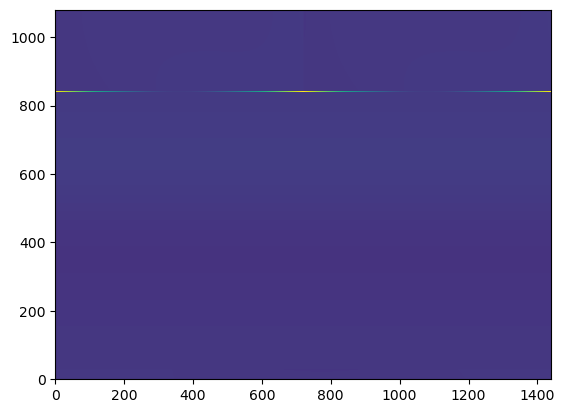

In [9]:
plt.pcolormesh(h.areacello - s.areacello)

#### Issue #2: `deptho` has a few points that do not match but do not impact the wet mask

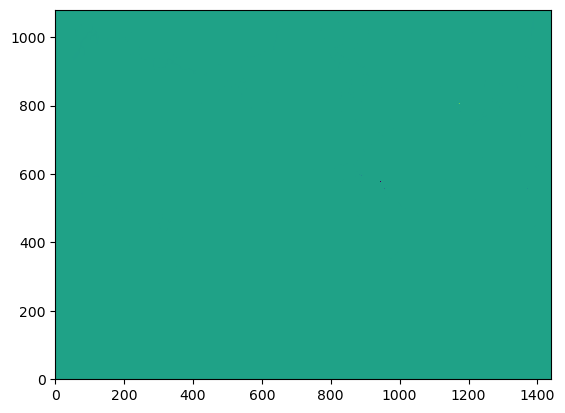

In [10]:
plt.pcolormesh(np.nan_to_num(h.deptho) - np.nan_to_num(s.deptho))

### Evaluate the U-velocity Cell Metrics

Text(0, 0.5, 'wet_u')

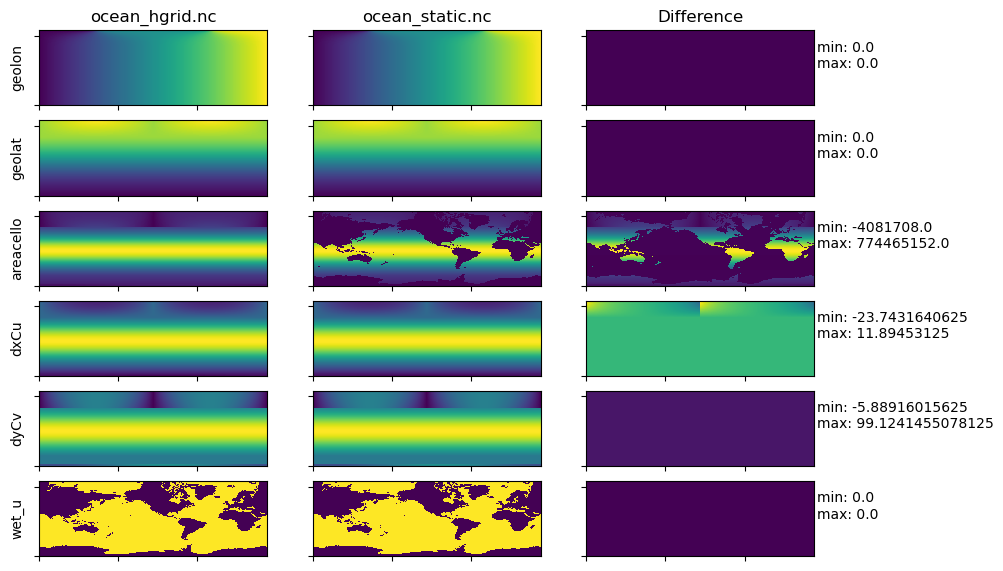

In [11]:
fig = plt.figure(figsize=(10, 8), dpi=100)

s = res_static
h = res_hgrid

axes = []
axes.append(_plot_panel(h.geolon_u, 1))
axes.append(_plot_panel(s.geolon_u, 2))
axes.append(_plot_panel(h.geolon_u - s.geolon_u, 3, stats=True))

axes.append(_plot_panel(h.geolat_u, 4))
axes.append(_plot_panel(s.geolat_u, 5))
axes.append(_plot_panel(h.geolat_u - s.geolat_u, 6, stats=True))

axes.append(_plot_panel(h.areacello_u, 7))
axes.append(_plot_panel(s.areacello_u, 8))
axes.append(_plot_panel(h.areacello_u - s.areacello_u, 9, stats=True))

axes.append(_plot_panel(h.dxCu, 10))
axes.append(_plot_panel(s.dxCu, 11))
axes.append(_plot_panel(h.dxCu - s.dxCu, 12, stats=True))

axes.append(_plot_panel(h.dyCu, 13))
axes.append(_plot_panel(s.dyCu, 14))
axes.append(_plot_panel(h.dyCu - s.dyCu, 15, stats=True))

axes.append(_plot_panel(h.wet_u, 16))
axes.append(_plot_panel(s.wet_u, 17))
axes.append(_plot_panel(h.wet_u - s.wet_u, 18, stats=True))

for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axes[0].set_title("ocean_hgrid.nc")
axes[1].set_title("ocean_static.nc")
axes[2].set_title("Difference")

axes[0].set_ylabel("geolon")
axes[3].set_ylabel("geolat")
axes[6].set_ylabel("areacello")
axes[9].set_ylabel("dxCu")
axes[12].set_ylabel("dyCv")
axes[15].set_ylabel("wet_u")

### Evaluate the V-velocity Cell Metrics

Text(0, 0.5, 'wet_v')

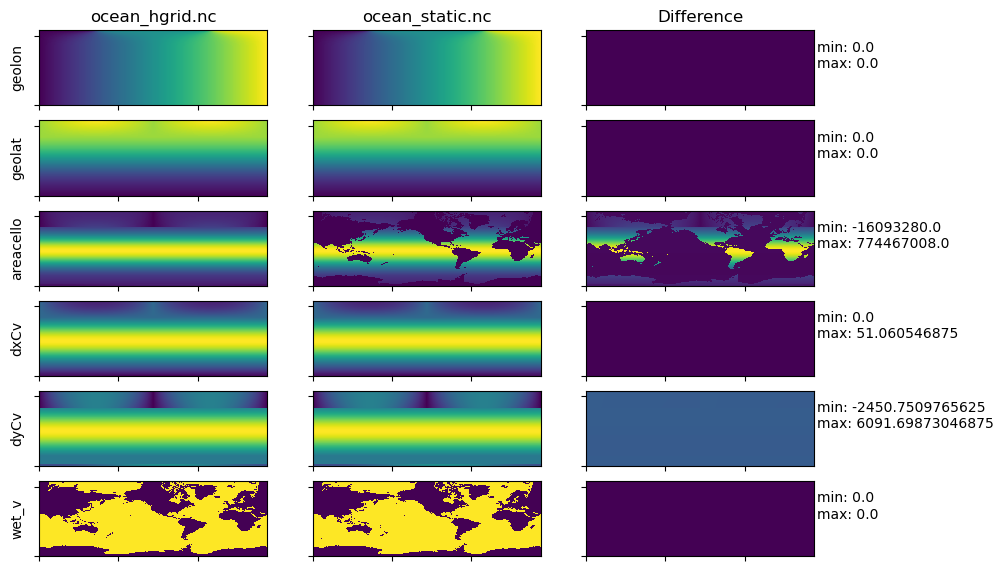

In [12]:
fig = plt.figure(figsize=(10, 8), dpi=100)

s = res_static
h = res_hgrid

axes = []
axes.append(_plot_panel(h.geolon_v, 1))
axes.append(_plot_panel(s.geolon_v, 2))
axes.append(_plot_panel(h.geolon_v - s.geolon_v, 3, stats=True))

axes.append(_plot_panel(h.geolat_v, 4))
axes.append(_plot_panel(s.geolat_v, 5))
axes.append(_plot_panel(h.geolat_v - s.geolat_v, 6, stats=True))

axes.append(_plot_panel(h.areacello_v, 7))
axes.append(_plot_panel(s.areacello_v, 8))
axes.append(_plot_panel(h.areacello_v - s.areacello_v, 9, stats=True))

axes.append(_plot_panel(h.dxCv, 10))
axes.append(_plot_panel(s.dxCv, 11))
axes.append(_plot_panel(h.dxCv - s.dxCv, 12, stats=True))

axes.append(_plot_panel(h.dyCv, 13))
axes.append(_plot_panel(s.dyCv, 14))
axes.append(_plot_panel(h.dyCv - s.dyCv, 15, stats=True))

axes.append(_plot_panel(h.wet_v, 16))
axes.append(_plot_panel(s.wet_v, 17))
axes.append(_plot_panel(h.wet_v - s.wet_v, 18, stats=True))

for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axes[0].set_title("ocean_hgrid.nc")
axes[1].set_title("ocean_static.nc")
axes[2].set_title("Difference")

axes[0].set_ylabel("geolon")
axes[3].set_ylabel("geolat")
axes[6].set_ylabel("areacello")
axes[9].set_ylabel("dxCv")
axes[12].set_ylabel("dyCv")
axes[15].set_ylabel("wet_v")

### Evaluate the Corner Cell Metrics

Text(0, 0.5, 'areacello')

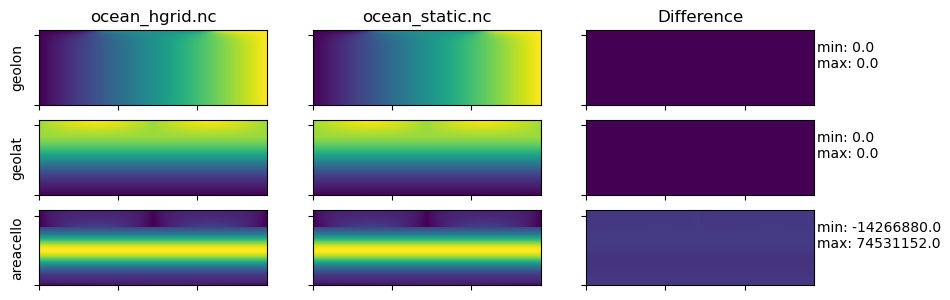

In [13]:
fig = plt.figure(figsize=(10, 8), dpi=100)

s = res_static
h = res_hgrid

axes = []
axes.append(_plot_panel(h.geolon_c, 1))
axes.append(_plot_panel(s.geolon_c, 2))
axes.append(_plot_panel(h.geolon_c - s.geolon_c, 3, stats=True))

axes.append(_plot_panel(h.geolat_c, 4))
axes.append(_plot_panel(s.geolat_c, 5))
axes.append(_plot_panel(h.geolat_c - s.geolat_c, 6, stats=True))

axes.append(_plot_panel(h.areacello_c, 7))
axes.append(_plot_panel(s.areacello_c, 8))
axes.append(_plot_panel(h.areacello_c - s.areacello_c, 9, stats=True))

for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axes[0].set_title("ocean_hgrid.nc")
axes[1].set_title("ocean_static.nc")
axes[2].set_title("Difference")

axes[0].set_ylabel("geolon")
axes[3].set_ylabel("geolat")
axes[6].set_ylabel("areacello")

#### Issue 3: `areacello_c` does not match between the static and the hgrid files

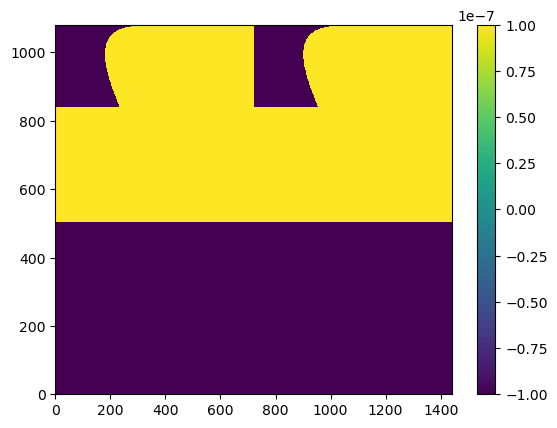

In [14]:
cb = plt.pcolormesh(h.areacello_c - s.areacello_c, vmin=-1e-7, vmax=1e-7)
plt.colorbar(cb)